In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


RMS 타이타닉은 1912년에 빙산과 충돌해 침몰한 여객선입니다. 타이타닉호의 침몰은 무려 1514명 정도가 사망한 비운의 사건이죠. 영화 ‘타이타닉’으로 인해 이름이 가장 널리 알려진 여객선이기도 합니다.

우리에게 주어진 `titanic.csv` 파일(다운로드)에는 당시 탑승자들의 정보가 담겨 있습니다. 생존 여부, 성별, 나이, 지불한 요금, 좌석 등급 등의 정보가 있는데요.

* 생존 여부는 `'Survived'` column에 저장되어 있습니다. 0이 사망, 1이 생존을 의미합니다.
* 좌석 등급은 `'Pclass'` column에 저장되어 있습니다. 1은 1등실, 2는 2등실, 3은 3등실을 의미합니다.
* 지불한 요금은 `'Fare'` column에 저장되어 있습니다.

## "타이타닉의 승객은 30대와 40대가 가장 많다."

<AxesSubplot:ylabel='Frequency'>

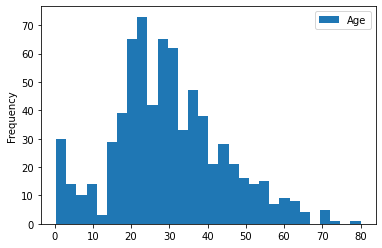

In [3]:
# 나이 분포
df.plot(kind='hist', y='Age', bins=30)

30대와 40대보다는 20대가 더 많기 때문에 틀린 설명입니다.

## "가장 높은 요금을 낸 사람은 30대이다."
나이와 요금 사이의 산점도를 그려서 확인해 봅시다.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

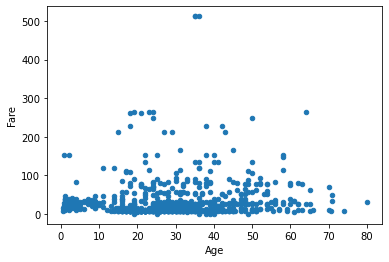

In [4]:
# 나이별 요금 분포
df.plot(kind='scatter', x='Age', y='Fare')

In [5]:
# 요금과 나이 정렬
age = df.loc[:, 'Age':'Fare']
age[['Age','Fare']].sort_values(ascending=False,by = ['Fare','Age'])

,Age,Fare
679,36.0,512.3292
258,35.0,512.3292
737,35.0,512.3292
438,64.0,263.0000
341,24.0,263.0000
...,...,...
481,NaN,0.0000
633,NaN,0.0000
674,NaN,0.0000
732,NaN,0.0000


가장 높은 요금을 낸 사람은 30대가 맞네요.

## "생존자가 사망자보다 많다"
생존 여부는 `'Survived'`라는 column에 저장되어 있습니다.  
`value_counts()` 메소드를 이용해서 살펴봅시다.

In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0이 사망, 1이 생존을 의미하니까 사망자가 더 많네요. 아쉽지만 틀린 보기였습니다.

## "1등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다."
이 보기는 `'Pcalss'`columns의 `'value_counts()'`로 알 수 있겠죠?

In [7]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

3등실의 사람이 491명으로 가장 많다는 것을 알 수 있습니다.

## "가장 생존율이 높은 객실 등급은 1등실이다."
객실 등급과 생존 여부에 대해서 그래프를 그려봐야겠네요.  
그런데 그냥 산점도를 그려보면 그림이 겹쳐서 알아보기 힘듭니다.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

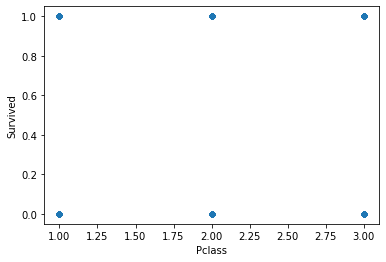

In [8]:
# 객실 등급별 생존율 분포
df.plot(kind='scatter', x='Pclass', y='Survived')

이런 경우, KDE Plot을 활용하면 겹쳐진 정도를 알 수 있습니다.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

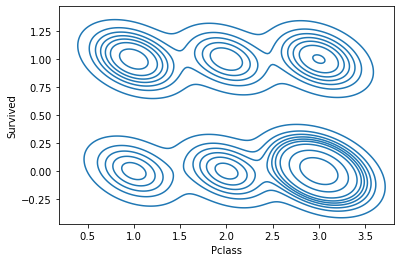

In [9]:
# 객실 등급별 생존율 분포
sns.kdeplot(x=df['Pclass'], y=df['Survived'])

그래프를 보면 3등실은 확실히 아래쪽에 더 밀집되어 있고, 2등실은 위쪽과 아래쪽이 비슷하게 분포하고 있습니다. 하지만 1등실은 위쪽이 더 밀집되어 있음을 알 수 있습니다.  
따라서, 1등실의 생존율이 더 높다는 것을 알 수 있네요.

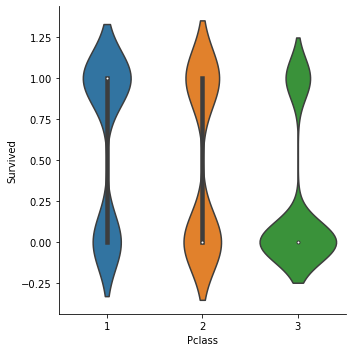

In [10]:
sns.catplot(data=df, x='Pclass', y='Survived', kind='violin')

## "나이가 어릴수록 생존율이 높다."
생존율에 대한 카테고리별 그래프를 그려서 확인해 봅시다.  
왼쪽이 사망자 그룹, 오른쪽이 생존자 그룹입니다.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

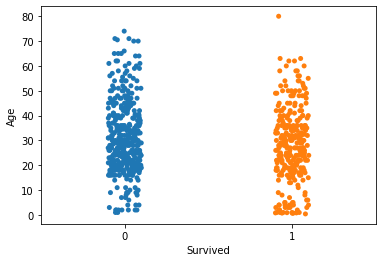

In [11]:
# 생존 여부에 따른 나이 분포
sns.stripplot(data=df, x='Survived', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

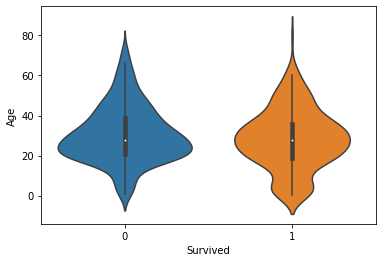

In [12]:
# 생존 여부에 따른 나이 분포
sns.violinplot(data=df, x='Survived', y='Age')

생존한 사람들의 나이 분포와 사망한 사람들의 나이 분포 사이에는 큰 차이가 보이지 않습니다.  
따라서 나이가 어릴수록 생존율이 높다고 하긴 어려울 것 같네요.

## "나이보다 성별이 생존율에 더 많은 영향을 미친다."
나이 뿐 아니라 성별도 한번 같이 파악해 봅시다.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

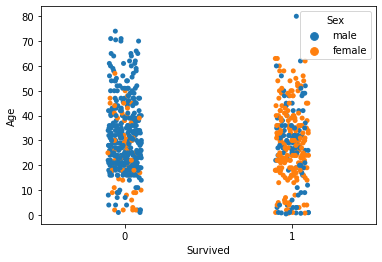

In [13]:
# 생존 여부에 따른 나이 및 성별 분포
sns.stripplot(data=df, x='Survived', y='Age', hue='Sex')

나이 분포는 비슷한 데 비해, 성별의 분포는 확연히 차이가 나죠?  
나이보다는 확실히 성별에 영향을 많이 받았다는 것을 알 수 있습니다.